In [1]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
digits = load_digits()
X = digits.data
Y = digits.target
print(X.shape)
print(Y.shape)

(1797, 64)
(1797,)


<Figure size 432x288 with 0 Axes>

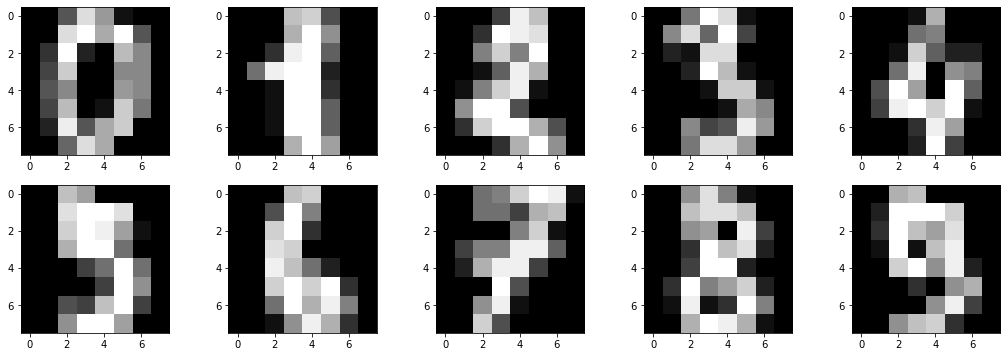

In [3]:
plt.gray()
f, axarr = plt.subplots(2,5,figsize=(18, 6))
axarr[0,0].imshow(digits.images[0])
axarr[0,1].imshow(digits.images[1])
axarr[0,2].imshow(digits.images[2])
axarr[0,3].imshow(digits.images[3])
axarr[0,4].imshow(digits.images[4])
axarr[1,0].imshow(digits.images[5])
axarr[1,1].imshow(digits.images[6])
axarr[1,2].imshow(digits.images[7])
axarr[1,3].imshow(digits.images[8])
axarr[1,4].imshow(digits.images[9])
plt.show()

In [4]:
x_train ,x_test ,y_train ,y_test = train_test_split(X,Y,test_size =0.2 )

In [5]:
v1 = y_train.shape[0]
v2 = y_test.shape[0]
k =  np.array([[0,0,0,0,0,0,0,0,0,0] for i in range(v1)])
k1 =  np.array([[0,0,0,0,0,0,0,0,0,0] for i in range(v2)])

c = 0 
for i in y_train:
    k[c][i] = 1 
    c = c + 1     
c = 0 
for i in y_test:
    k1[c][i] = 1 
    c = c + 1  
    
y_train = k
y_test = k1

In [6]:
print("The shape of x_train :", x_train.shape)
print("The shape of y_train :", y_train.shape)

The shape of x_train : (1437, 64)
The shape of y_train : (1437, 10)


In [7]:
def Softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


# He initialization
def initializeParametersHe(inputSize, hiddenLayerSize, outputSize):
    W1 = np.random.randn(hiddenLayerSize, inputSize) * np.sqrt(2/inputSize)
    W2 = np.random.randn(outputSize, hiddenLayerSize) * np.sqrt(2/hiddenLayerSize)
    b1 = np.zeros((hiddenLayerSize, 1))
    b2 = np.zeros((outputSize, 1))
    # We store our parameters in a dict and return them
    parameters = {"W1" : W1, "b1" : b1, "W2" : W2, "b2" : b2}
    return parameters

In [8]:
def forwardPropagation(X, Y, parameters):
    W1, W2, b1, b2 = parameters["W1"], parameters["W2"], parameters["b1"], parameters["b2"]
    
    Z1 = np.dot(X, W1.T) + b1.T
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2.T) + b2.T
    A2 = Softmax(Z2)
    
    cache = (Z1, A1, W1, b1, Z2, A2, W2, b2)
    cost = -(1/Y.shape[0])*np.sum(Y*np.log(A2))
    
    return cost, cache, A2

In [9]:
def backwardPropagation(X, y, parameters):
    m = X.shape[0]
    (Z1, A1, W1, b1, Z2, A2, W2, b2) = cache 
    
    dZ2 = A2 - y
    dW2 = np.dot(dZ2.T, A1) / m
    db2 = np.sum(dZ2.T, axis=1, keepdims = True) / m
    
    dA1 = np.dot(dZ2, W2)
    dZ1 = np.multiply(dA1, A1 * (1-A1)) / m
    dW1 = np.dot(dZ1.T, X) / m
    db1 = np.sum(dZ1.T, axis = 1, keepdims = True) / m
    
    gradients = {"dZ2":dZ2, "dW2" : dW2, "db2" : db2, "dZ1": dZ1, "dW1":dW1, "db1":db1}
    return gradients

In [10]:
def updateParameters(parameters, gradients, learningRate):
    parameters["W1"] = parameters["W1"] - learningRate * gradients["dW1"]
    parameters["W2"] = parameters["W2"] - learningRate * gradients["dW2"]
    parameters["b1"] = parameters["b1"] - learningRate * gradients["db1"]
    parameters["b2"] = parameters["b2"] - learningRate * gradients["db2"]
    return parameters

In [11]:
hiddenLayerSize = 160 # number of hidden layer neurons (160)
inputSize = x_train.shape[1] # number of input features (64)
outputSize = y_train.shape[1] # number of output features (10)
parameters = initializeParametersHe(inputSize, hiddenLayerSize, outputSize)

epoch = 300
learningRate = 0.015
losses = np.zeros((epoch, 1))

for i in range(epoch):
    losses[i,0], cache, A2 = forwardPropagation(x_train, y_train, parameters)
    gradients = backwardPropagation(x_train, y_train, cache)
    parameters = updateParameters(parameters, gradients, learningRate)

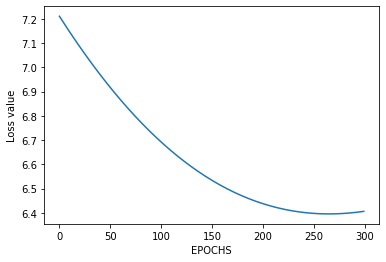

In [12]:
plt.figure()
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")
plt.show()

In [13]:
from sklearn.metrics import accuracy_score

cost,_,a2 = forwardPropagation(x_test,y_test,parameters)
y_pred=np.argmax(a2 ,axis=1)
y_true=np.argmax(y_test, axis=1)

print(accuracy_score(y_true, y_pred))

0.8305555555555556
